In [1]:
import json, pathlib, random, time
from collections import defaultdict
import numpy as np
import pandas as pd
import multiprocessing as mp

from environment import Env, validate_against_hint, load_word_lists, construct_word_df


In [2]:
df = construct_word_df(*load_word_lists())

In [3]:
#https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count


# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

#plt.ion()


In [4]:
#Get number of actions from gym action space
#n_actions = env.action_space.n
n_action_features = 5
n_state_features = 9
n_input_features = n_action_features + n_state_features


def plot_values(vals, axes=['duration', 'episode']):
    plt.figure(2)
    plt.clf()
    plt.title('Training...')
    plt.xlabel(axes[1])
    plt.ylabel(axes[0])
    plt.plot(np.array(vals))
    # Take 20 episode averages and plot them too
    window_width = 20
    if len(vals) >= window_width:
        cumsum_vec = np.cumsum(np.insert(vals, 0, 0)) 
        ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
        plt.plot(np.insert(ma_vec, 0, [None]*int(window_width/2)))

    plt.pause(0.001)  # pause a bit so that plots are updated
    #if is_ipython:
    #    display.clear_output(wait=True)
    #    display.display(plt.gcf())
    
def plot_all(episode_durations, episode_rewards, losses, epsilons, gammas):
    plot_values(episode_durations, axes=['duration', 'episode'])
    plot_values(episode_rewards, axes=['reward', 'episode'])
    if losses: plot_values(losses, axes=['loss', 'step'])
    if epsilons: plot_values(epsilons, axes=['epsilon', 'step'])
    if gammas: plot_values(gammas, axes=['gamma', 'step'])
    #plt.ioff()
    plt.show()

In [5]:

class TrainConfig():
    def __init__(self, train_interval=128, batch_size=128, clear_memory=False, lr=0.01):
        self.train_interval = train_interval
        self.batch_size = batch_size
        self.clear_memory = clear_memory
        self.lr = lr
        
class ValueConfig():
    def __init__(self, name='reward', gamma=[0.9, 0.05, 200]):
        self.name = name
        self.gamma = gamma
        
class ModelConfig():
    def __init__(self, name='naive', startword=None, target_list_only=None):
        self.name = name
        self.startword = startword
        self.target_list_only = target_list_only

In [13]:
#https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
def run_experiment(model=ModelConfig(name='naive', startword=None, target_list_only=False),
                   num_episodes=128,
                   eps=[0.9, 0.05, 200],
                   value_function=ValueConfig(name='reward',gamma=[0.0, 1.0, 200]),
                   training=TrainConfig(clear_memory=False, batch_size=128, train_interval=128),
                   seed=0,
                   run_test=False):
    #torch.manual_seed(0)
    random.seed(seed)
    np.random.seed(seed)
    env = Env(df)
    #memory = ReplayMemory(10000)
    
    steps_done = 0
    last_training = 0
    losses = []
    episode_rewards = []
    episode_durations = []
    epsilons = []
    gammas = []
    
    
    for i_episode in range(num_episodes):
        # Initialize the environment and state
        env.reset()
        print(f'=========================episode {i_episode} {env.target}======================')

        episode_memory = []
        guesses = []
        for t in count():
            steps_done += 1
            # Select and perform an action
            #print(state, actions)
            
            
            #MODEL
            if t == 0 and model.startword:
                chosen_word = model.startword
            else:
                chosen_word = env.sample_word_matching_current_history(env.df)
            #/MODEL
            
            
            guesses.append(chosen_word)
            print(f'------guess {t} {guesses[-1]} -------')
            history, reward, done = env.step(chosen_word)
            episode_memory.append(reward)
                       
            print(f'reward {reward} done {done} ')
            
            if done:
                episode_durations.append(t + 1)
                episode_reward = sum(episode_memory)
                print(f'episode {i_episode} finished.  reward {t + 1} {episode_reward} {steps_done}')
                episode_rewards.append(episode_reward)
                break

    print('Complete')
    
    if run_test:
        performance_hist = [0] * (1 + env.num_guesses)
        for e in env.foreach_target_word():
            
            done = False
            reward = 0
            num_guesses = 0
            while not done:
                #MODEL
                if num_guesses == 0 and model.startword:
                    chosen_word = model.startword
                else:
                    chosen_word = env.sample_word_matching_current_history(env.df)
                #/MODEL
                _, reward, done = e.step(chosen_word)
                num_guesses += 1
            
            if num_guesses == 6 and reward == -1:
                num_guesses = 0
            print(f'{e.target} {num_guesses}')    
            performance_hist[num_guesses] += 1
            
        for i,p in enumerate(performance_hist):
            print(f'{i}: {p}')
    
    return episode_durations, episode_rewards, losses, epsilons, gammas

#env.render()
#env.close()
#plt.ioff()
#plt.show()

Complete
cigar 3
rebut 3
sissy 3
humph 4
awake 4
blush 3
focal 4
evade 4
naval 5
serve 4
heath 4
dwarf 4
model 6
karma 4
stink 4
grade 0
quiet 5
bench 5
abate 0
feign 5
major 3
death 0
fresh 5
crust 4
stool 4
colon 4
abase 6
marry 5
react 5
batty 4
pride 4
floss 6
helix 5
croak 5
staff 3
paper 0
unfed 0
whelp 4
trawl 0
outdo 4
adobe 5
crazy 0
sower 0
repay 3
digit 6
crate 6
cluck 4
spike 5
mimic 5
pound 5
maxim 6
linen 3
unmet 0
flesh 4
booby 0
forth 4
first 4
stand 5
belly 6
ivory 4
seedy 5
print 6
yearn 4
drain 0
bribe 0
stout 0
panel 6
crass 6
flume 4
offal 5
agree 5
error 2
swirl 4
argue 4
bleed 6
delta 4
flick 5
totem 4
wooer 6
front 6
shrub 3
parry 0
biome 5
lapel 4
start 5
greet 4
goner 0
golem 5
lusty 3
loopy 5
round 4
audit 5
lying 4
gamma 4
labor 0
islet 5
civic 4
forge 6
corny 0
moult 3
basic 6
salad 5
agate 5
spicy 4
spray 5
essay 3
fjord 3
spend 6
kebab 5
guild 5
aback 5
motor 2
alone 3
hatch 0
hyper 6
thumb 5
dowry 5
ought 3
belch 6
dutch 0
pilot 3
tweed 4
comet 6
jaunt 0

sepia 5
amble 3
shady 6
bread 5
friar 5
reign 5
dairy 0
quill 3
cross 6
brood 3
tuber 6
shear 5
posit 3
blank 4
villa 5
shank 3
piggy 6
freak 0
which 5
among 4
fecal 5
shell 4
would 5
algae 3
large 4
rabbi 4
agony 5
amuse 5
bushy 0
copse 6
swoon 5
knife 4
pouch 6
ascot 4
plane 0
crown 5
urban 5
snide 5
relay 0
abide 5
viola 4
rajah 5
straw 6
dilly 3
crash 4
amass 4
third 5
trick 6
tutor 4
woody 6
blurb 4
grief 4
disco 4
where 5
sassy 0
beach 4
sauna 5
comic 5
clued 5
creep 4
caste 3
graze 5
snuff 6
frock 0
gonad 5
drunk 5
prong 5
lurid 5
steel 0
halve 6
buyer 5
vinyl 4
utile 3
smell 5
adage 6
worry 6
tasty 4
local 5
trade 4
finch 4
ashen 3
modal 5
gaunt 6
clove 5
enact 3
adorn 3
roast 3
speck 4
sheik 4
missy 5
grunt 5
snoop 4
party 2
touch 5
mafia 4
emcee 5
array 5
south 5
vapid 4
jelly 5
skulk 5
angst 4
tubal 4
lower 5
crest 5
sweat 5
cyber 5
adore 3
tardy 3
swami 6
notch 5
groom 5
roach 4
hitch 0
young 5
align 3
ready 5
frond 4
strap 4
puree 4
realm 4
venue 5
swarm 6
offer 6
seven 6


brunt 4
grimy 5
curvy 0
cagey 3
rinse 5
deuce 5
state 6
grasp 5
milky 5
bison 5
graft 0
sandy 4
baste 4
flask 4
hedge 5
girly 5
swash 5
boney 6
coupe 0
endow 4
abhor 4
welch 2
blade 4
tight 0
geese 4
miser 4
mirth 5
cloud 4
cabal 0
leech 5
close 3
tenth 4
pecan 5
droit 6
grail 6
clone 5
guise 4
ralph 4
tango 3
biddy 4
smith 4
mower 0
payee 6
serif 6
drape 5
fifth 5
spank 6
glaze 5
allot 5
truck 6
kayak 5
virus 3
testy 0
tepee 4
fully 4
zonal 4
metro 2
curry 3
grand 6
banjo 3
axion 6
bezel 6
occur 2
chain 4
nasal 5
gooey 5
filer 0
brace 0
allay 3
pubic 5
raven 2
plead 3
gnash 5
flaky 4
munch 0
dully 0
eking 5
thing 5
slink 4
hurry 4
theft 6
shorn 3
pygmy 4
ranch 3
wring 6
lemon 4
shore 5
mamma 4
froze 4
newer 6
style 4
moose 5
antic 5
drown 6
vegan 3
chess 5
guppy 4
union 4
lever 5
lorry 4
image 4
cabby 6
druid 3
exact 4
truth 3
dopey 6
spear 4
cried 5
chime 3
crony 5
stunk 6
timid 4
batch 0
gauge 3
rotor 3
crack 5
curve 5
latte 5
witch 0
bunch 4
repel 4
anvil 3
soapy 4
meter 2
broth 6


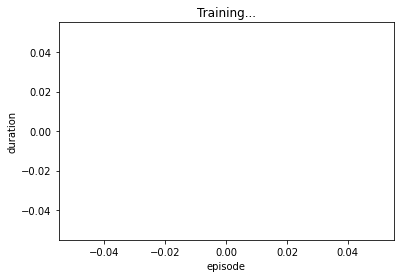

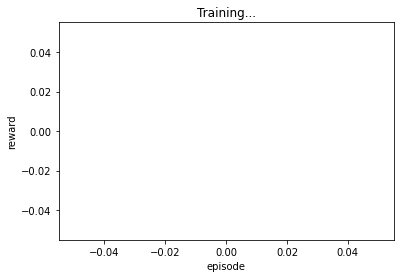

In [16]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword='oater', target_list_only=True),
    num_episodes=0,
    run_test=True
    ))


In [ ]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword=None, target_list_only=True),
    num_episodes=64
    ))

In [ ]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword='roate', target_list_only=True),
    num_episodes=150
    ))


In [ ]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword='oater', target_list_only=True),
    num_episodes=150
    ))
